In [2]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Additional explorations

In [11]:
# 1) It is common in DL to train the model for a specified number of epochs. But you can also train until
#    the model reaches a certain accuracy criterion. Re-write the code so that the model continues training
#    until it reaches 90% accuracy.
#    What would happen if the model falls into a local minimum and never reaches 90% accuracy? Yikes! You can
#    force-quit a process in google-colab by clicking on the top-left 'play' button of a code cell.


In [12]:
#1) Train the model on reaches 90% accuracy

# create data

nPerClust = 95
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),   # input layer
    nn.ReLU(),        # activation unit
    nn.Linear(1,1),   # output unit
    nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
      )

ANNclassify

# other model features

learningRate = .01

# loss function
lossfun = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)


Final accuracy: 90.00% (Target achieved after 521 iterations)


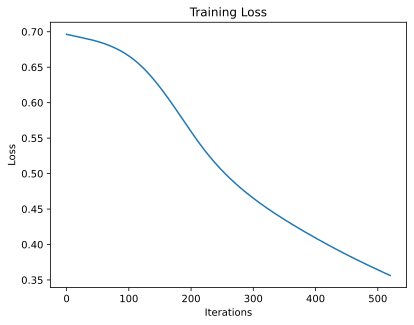

In [13]:
# Paramètres d'entraînement
accuracy_Target = 90
totalacc = 0
iteration = 0
losses = []

while totalacc < accuracy_Target:
    # forward pass
    yHat = ANNclassify(data)

    # compute loss
    loss = lossfun(yHat, labels)
    losses.append(loss.item())

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute the predictions
    predictions = ANNclassify(data)
    predlabels = predictions > 0.5

    # find errors
    misclassified = np.where(predlabels.cpu().numpy() != labels.cpu().numpy())[0]

    # total accuracy
    totalacc = 100 - 100 * len(misclassified) / (2 * nPerClust)
    iteration += 1
    

print(f"Final accuracy: {totalacc:.2f}% (Target achieved after {iteration} iterations)")

# Afficher les pertes
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

Final accuracy: 100.00% (Target achieved after 358 iterations)


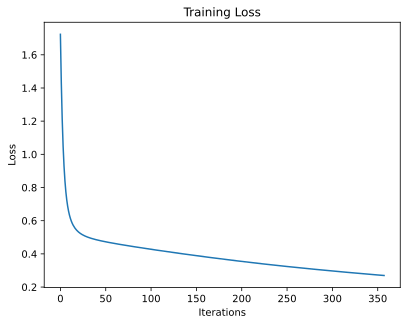

In [15]:
# 2) It is intuitive that the model can reach 100% accuracy if the qwerties are more separable. Modify the 
#    qwerty-generating code to get the model to have 100% classification accuracy.


# create data

nPerClust = 95
blur = 1

A = [  1, 1 ]
B = [  20, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),   # input layer
    nn.ReLU(),        # activation unit
    nn.Linear(1,1),   # output unit
    nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
      )

ANNclassify

# other model features

learningRate = .01

# loss function
lossfun = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

# Paramètres d'entraînement
accuracy_Target = 100
totalacc = 0
iteration = 0
losses = []

while totalacc < accuracy_Target:
    # forward pass
    yHat = ANNclassify(data)

    # compute loss
    loss = lossfun(yHat, labels)
    losses.append(loss.item())

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute the predictions
    predictions = ANNclassify(data)
    predlabels = predictions > 0.5

    # find errors
    misclassified = np.where(predlabels.cpu().numpy() != labels.cpu().numpy())[0]

    # total accuracy
    totalacc = 100 - 100 * len(misclassified) / (2 * nPerClust)
    iteration += 1
    

print(f"Final accuracy: {totalacc:.2f}% (Target achieved after {iteration} iterations)")

# Afficher les pertes
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


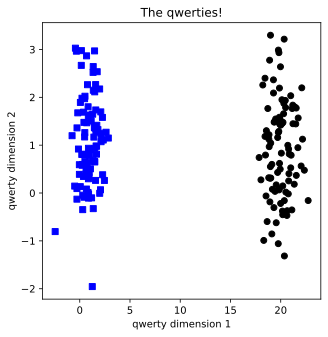

In [16]:
# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()